#Técnincas de análise e visualização de dados em Python.

## Introdução:
Uma agência de meteorologia contratou um analista de dados para realizar um relatório sobre os dados de temperatura coletados ao longo do tempo. Este estudo será apresentado aos especialistas em reuniões futuras.

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Tratamento dos dados.

In [24]:
# Importando as bibliotecas necessárias.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# Chamando um o arquivo via  pandas, nomeando a variável df para simplicidade e agilidade.
df = pd.read_csv('/content/drive/MyDrive/Code/Pyhton-Alura-Code/Data Visualization/dados/temperatura.csv', sep= ',')
df.head()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,2.820800e+02,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,2.820800e+02,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,2.820833e+11,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,2.820919e+11,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,2.821005e+11,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00


In [26]:
# Aplicar o filtro e adicionar o separador decimal
df['temperatura'] = df['temperatura'].astype(str).str[:3]
df['temperatura']= df['temperatura'].astype(float)
df['temperatura'].head()

0    282.0
1    282.0
2    282.0
3    282.0
4    282.0
Name: temperatura, dtype: float64

In [27]:
# Aplicar o filtro para selecionar temperaturas entre 250 e 320
filtro = (df['temperatura'] >= 250) & (df['temperatura'] <= 320)
df = df[filtro]

In [28]:
# Convertendo Kelvin para Celsius.
df['temperatura'] = df['temperatura'] - 273
df

<ipython-input-28-ea325bc494d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temperatura'] = df['temperatura'] - 273


,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,9.0,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,9.0,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,9.0,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,9.0,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,9.0,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00
...,...,...,...,...,...,...,...
45248,9.0,1031.0,81.0,50.0,2.0,Terça,2017-11-29 20:00:00
45249,9.0,1030.0,71.0,330.0,1.0,Terça,2017-11-29 21:00:00
45250,10.0,1030.0,71.0,290.0,1.0,Terça,2017-11-29 22:00:00
45251,10.0,1029.0,71.0,290.0,2.0,Terça,2017-11-29 23:00:00


In [29]:
# A função info() informa o tipo de  variável de cada série, se existem dados faltantes e outros pontos relevantes. Por exemplo o campo data esta marcado como objeto(String).
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44158 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          44158 non-null  float64
 1   pressão              44158 non-null  float64
 2   humidade             44158 non-null  float64
 3   direção do vento     44158 non-null  float64
 4   velocidade do vento  44158 non-null  float64
 5   dia_da_semana        44158 non-null  object 
 6   data                 44158 non-null  object 
dtypes: float64(5), object(2)
memory usage: 3.7+ MB


In [30]:
# Usando a função to_datetime na coluna data convertemos o tipo de variável objeto (string) em formato datetime. Importante para manipulação gráfica.
df['data'] = pd.to_datetime(df['data'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44158 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   temperatura          44158 non-null  float64       
 1   pressão              44158 non-null  float64       
 2   humidade             44158 non-null  float64       
 3   direção do vento     44158 non-null  float64       
 4   velocidade do vento  44158 non-null  float64       
 5   dia_da_semana        44158 non-null  object        
 6   data                 44158 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 3.7+ MB


##Visualizando dados.

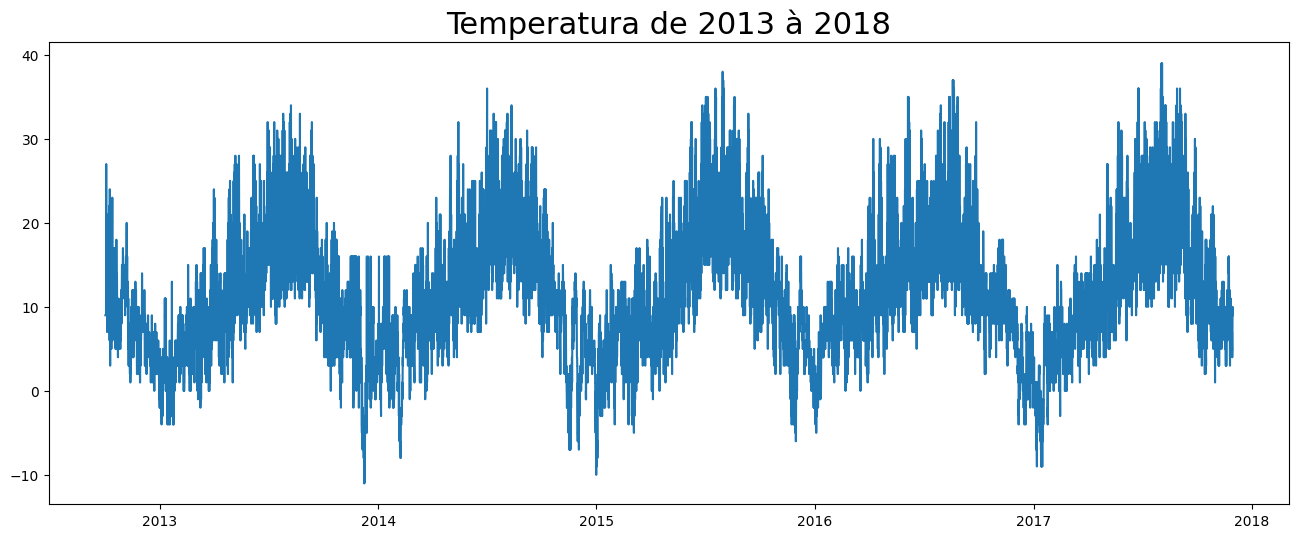

In [31]:
# Determinando o tamanho do gráfico.
plt.figure(figsize=(16,6))

# Declarando o plot com as variáveis
plt.plot(df['data'],df['temperatura'])

# Adcionando Título
plt.title('Temperatura de 2013 à 2018', fontsize = 22)

# Comando para exibir o gráfico sem filtro para loops.
plt.show()

Text(0.5, 1.0, 'Temperatura no momento')

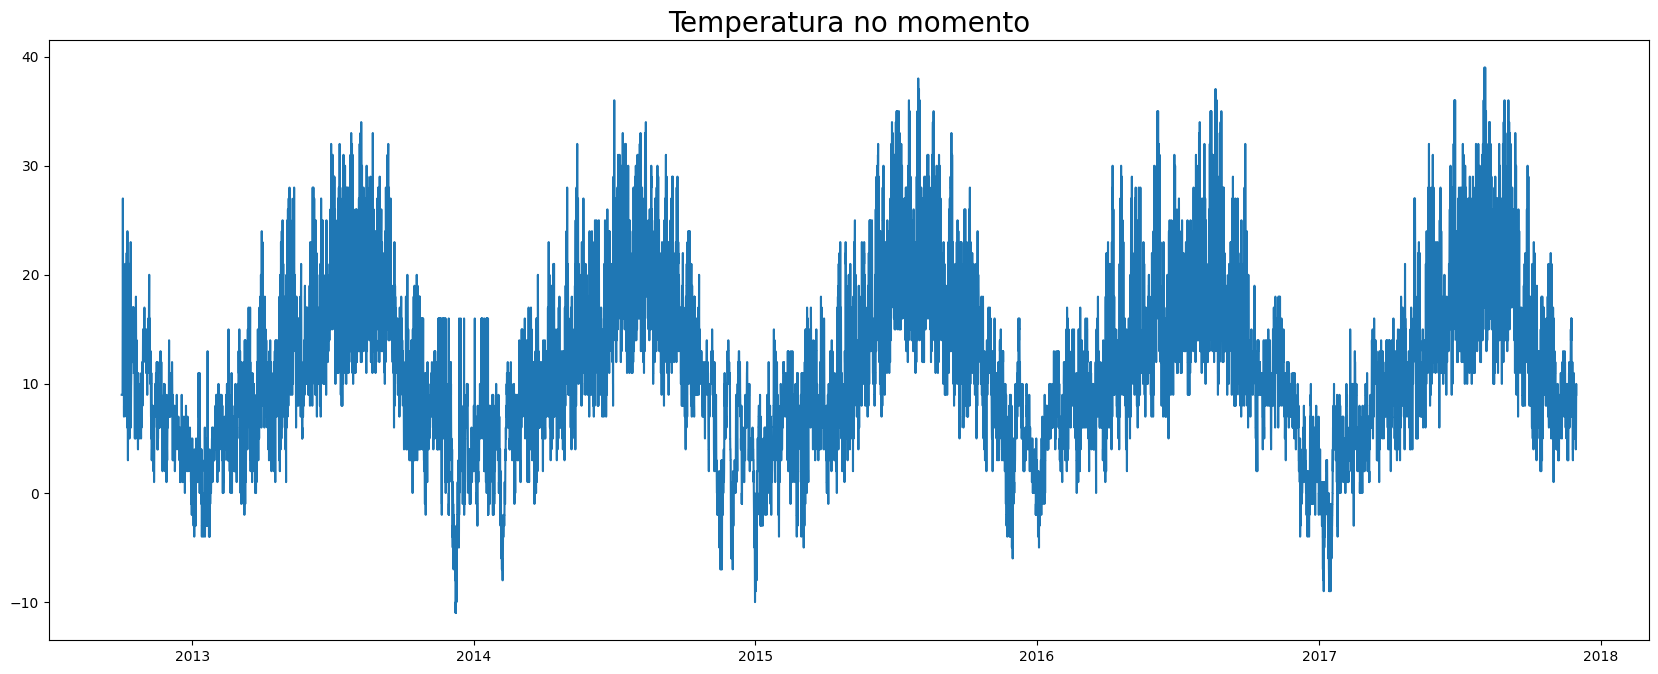

In [32]:
# definindo uma variável com a função do tamanho.
fig= plt.figure(figsize=(16,6))

# Criamos agora uma variávelara os eixos.
eixo = fig.add_axes([0,0,1,1])

# A partir da variável eixo, passamos os parâmetros x,y.
eixo.plot(df['data'],df['temperatura'])

# plotamos o título diretamente da variável.
eixo.set_title('Temperatura no momento', fontsize = 20)

# A formatação desta forma, permite realizar modificações com maior liberdade.

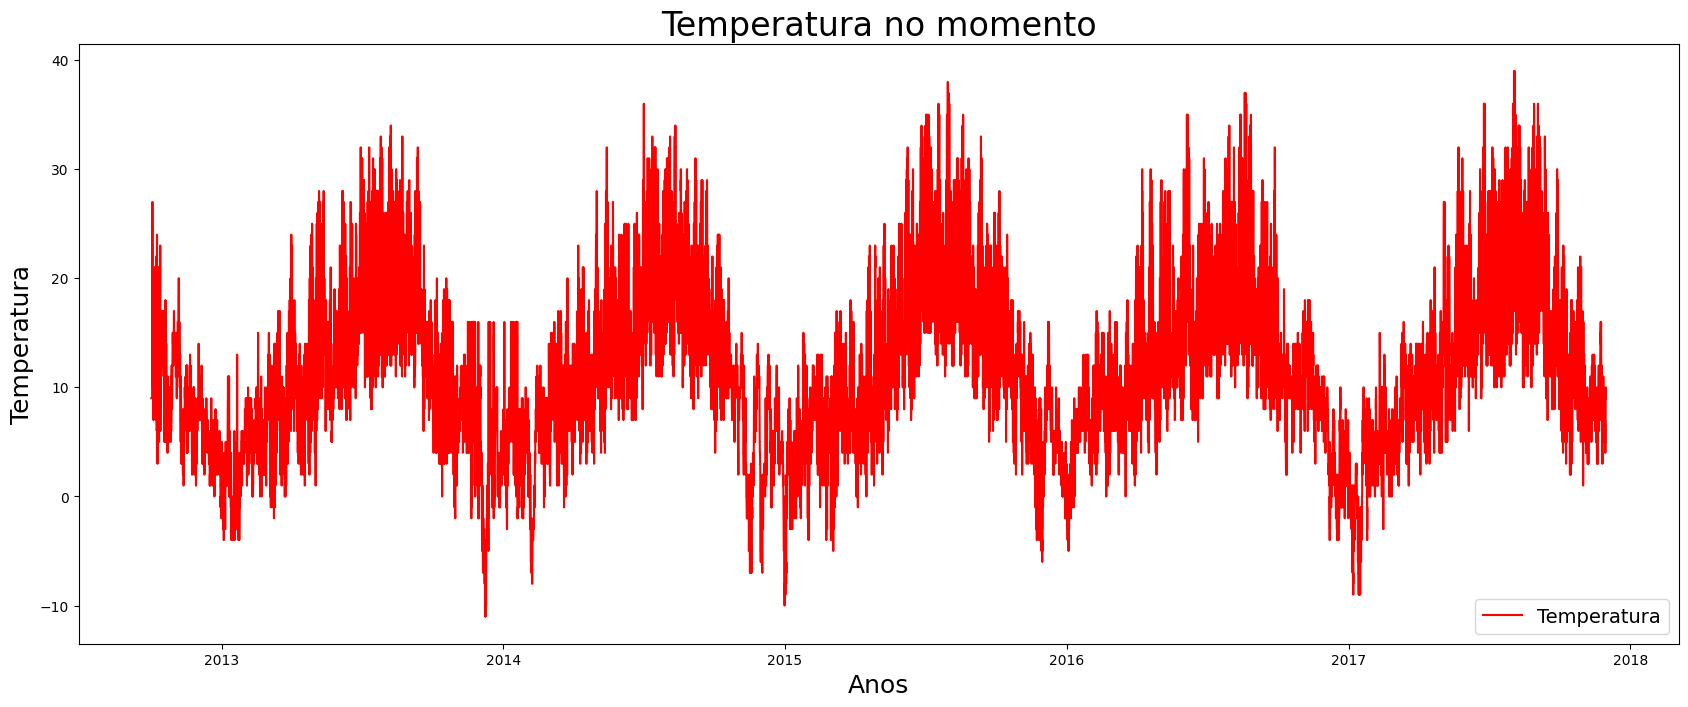

In [33]:
# definindo uma variável com a função do tamanho.
fig= plt.figure(figsize=(16,6))

# Criamos agora uma variávelara os eixos.
eixo = fig.add_axes([0,0,1,1])

# A partir da variável eixo, passamos os parâmetros x,y. E Podemos colocar a cor nos parâmetros tb.
eixo.plot(df['data'],df['temperatura'], color = 'red')

# plotamos o título diretamente da variável.
eixo.set_title('Temperatura no momento', fontsize = 24)

#Nome do eixo x
eixo.set_xlabel('Anos', fontsize= 18)

#Nome do eixo y
eixo.set_ylabel('Temperatura', fontsize= 18)

# Adicionando a legenda
eixo.legend(['Temperatura'], loc = "lower right", fontsize = 14)


## Customizações adicionais.

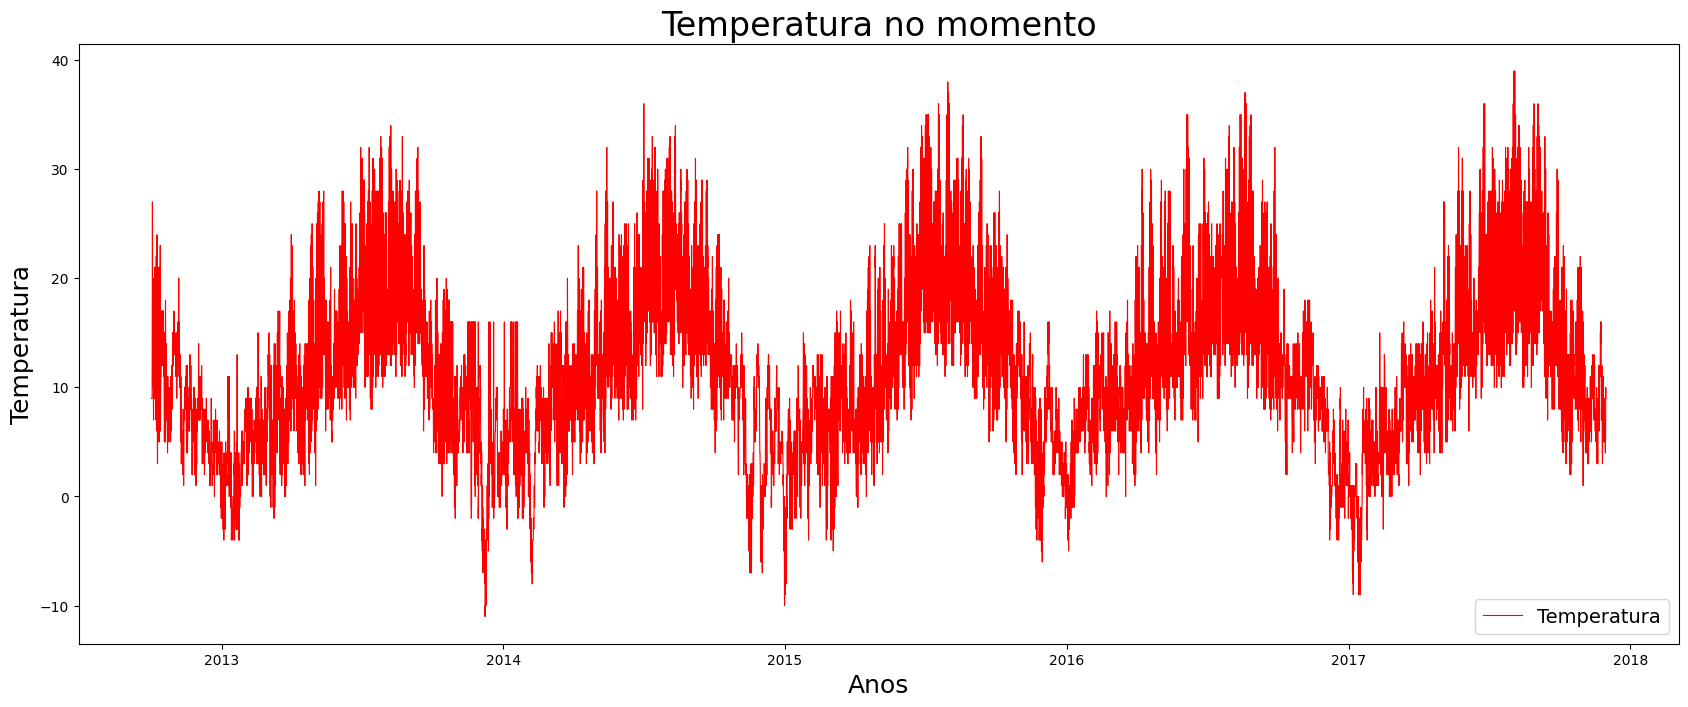

In [34]:
# definindo uma variável com a função do tamanho.
fig= plt.figure(figsize=(16,6))

# Criamos agora uma variávelara os eixos.
eixo = fig.add_axes([0,0,1,1])

# A partir da variável eixo, passamos os parâmetros x,y. E Podemos colocar a cor nos parâmetros tb.
eixo.plot(df['data'],df['temperatura'], color = 'red', lw= 0.8) # LW É ABREVIAÇÃO PARA LINE WIDTH, ou seja, mudamos a expessura

# plotamos o título diretamente da variável.
eixo.set_title('Temperatura no momento', fontsize = 24)

#Nome do eixo x
eixo.set_xlabel('Anos', fontsize= 18)

#Nome do eixo y
eixo.set_ylabel('Temperatura', fontsize= 18)

# Adicionando a legenda
eixo.legend(['Temperatura'], loc = "lower right", fontsize = 14)

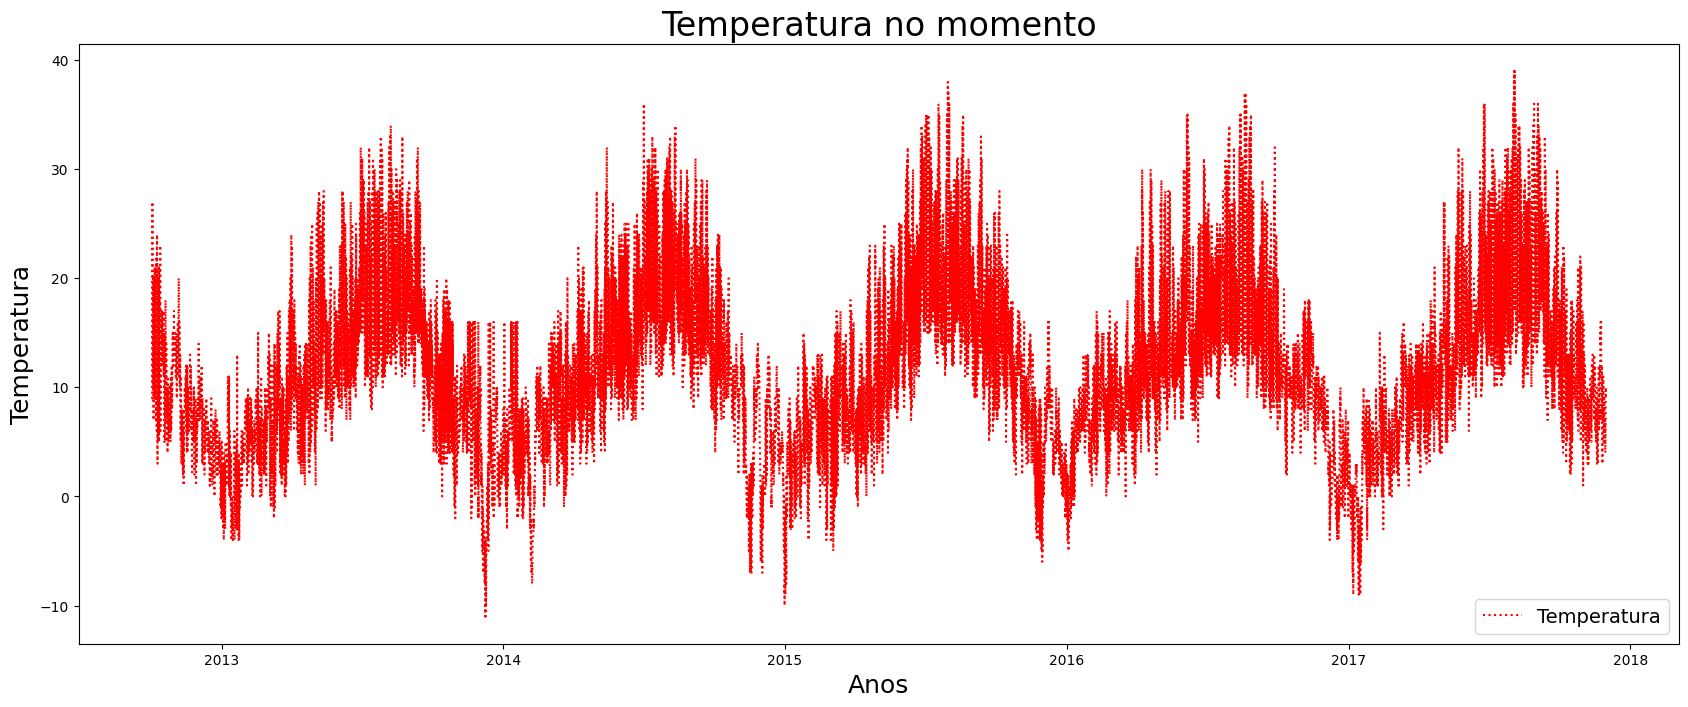

In [35]:
# definindo uma variável com a função do tamanho.
fig= plt.figure(figsize=(16,6))

# Criamos agora uma variávelara os eixos.
eixo = fig.add_axes([0,0,1,1])

# A partir da variável eixo, passamos os parâmetros x,y. E Podemos colocar a cor nos parâmetros tb.
eixo.plot(df['data'],df['temperatura'], color = 'red', ls= 'dotted') # COMANDO LS É ABREVIAÇÃO PAR LINE STYLE, ou seja, mudamos o estilo da linha para pontilhado

# plotamos o título diretamente da variável.
eixo.set_title('Temperatura no momento', fontsize = 24)

#Nome do eixo x
eixo.set_xlabel('Anos', fontsize= 18)

#Nome do eixo y
eixo.set_ylabel('Temperatura', fontsize= 18)

# Adicionando a legenda
eixo.legend(['Temperatura'], loc = "lower right", fontsize = 14)

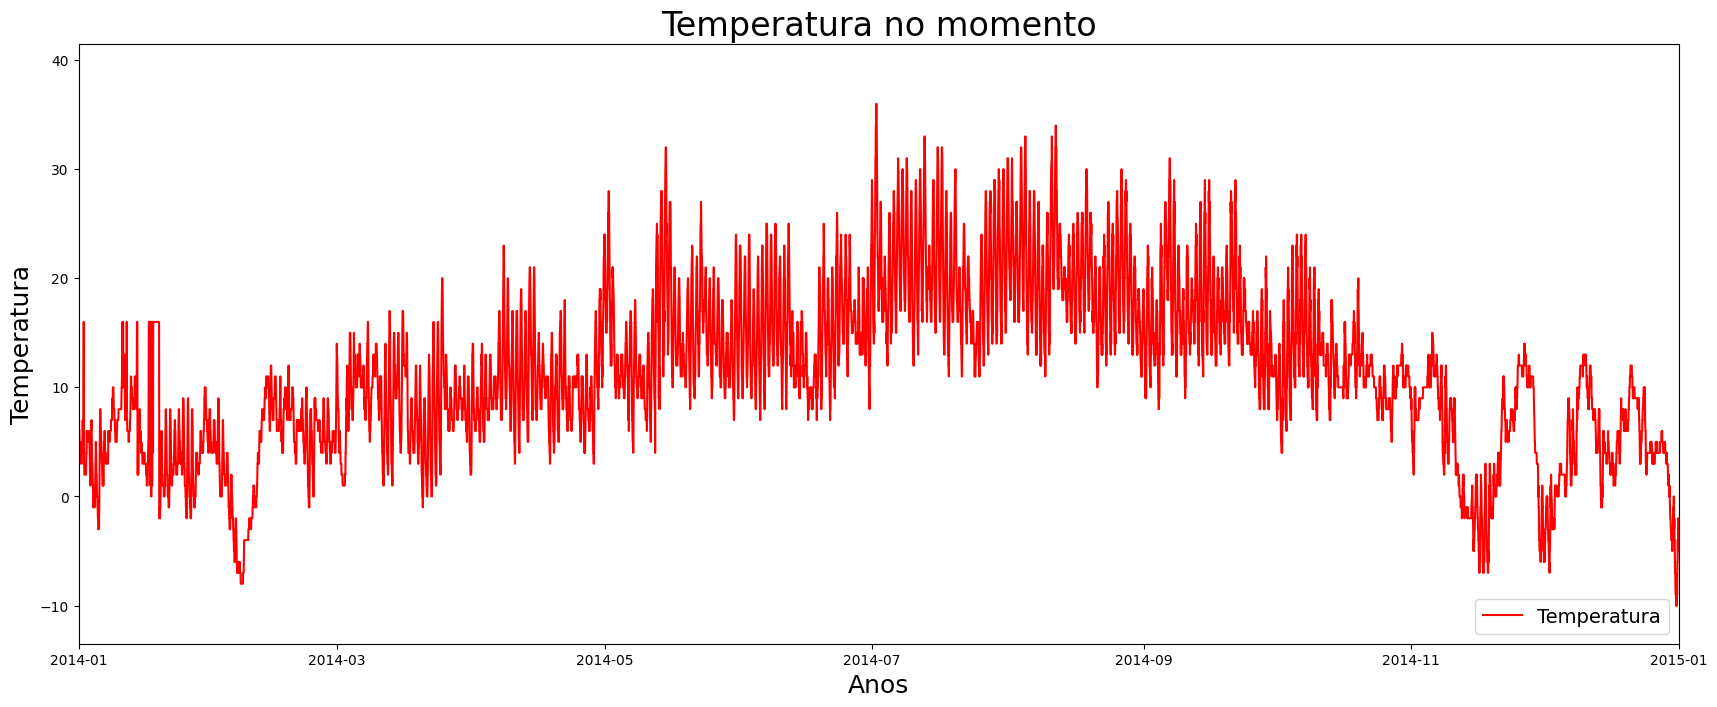

In [36]:
# É necessário importar o datetime, ele funciona como biblioteca.
import datetime

# definindo uma variável com a função do tamanho.
fig= plt.figure(figsize=(16,6))

# Criamos agora uma variávelara os eixos.
eixo = fig.add_axes([0,0,1,1])

# A partir da variável eixo, passamos os parâmetros x,y. E Podemos colocar a cor nos parâmetros tb.
eixo.plot(df['data'],df['temperatura'], color = 'red')

# plotamos o título diretamente da variável.
eixo.set_title('Temperatura no momento', fontsize = 24)

# ADICIONANDO UM LIMITE PARA O EIXO X
eixo.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2015,1,1)) # como o eixo x é um eixo de datas, precisamos passar o parâmetro em datetime.

#Nome do eixo x
eixo.set_xlabel('Anos', fontsize= 18)

#Nome do eixo y
eixo.set_ylabel('Temperatura', fontsize= 18)

# Adicionando a legenda
eixo.legend(['Temperatura'], loc = "lower right", fontsize = 14)

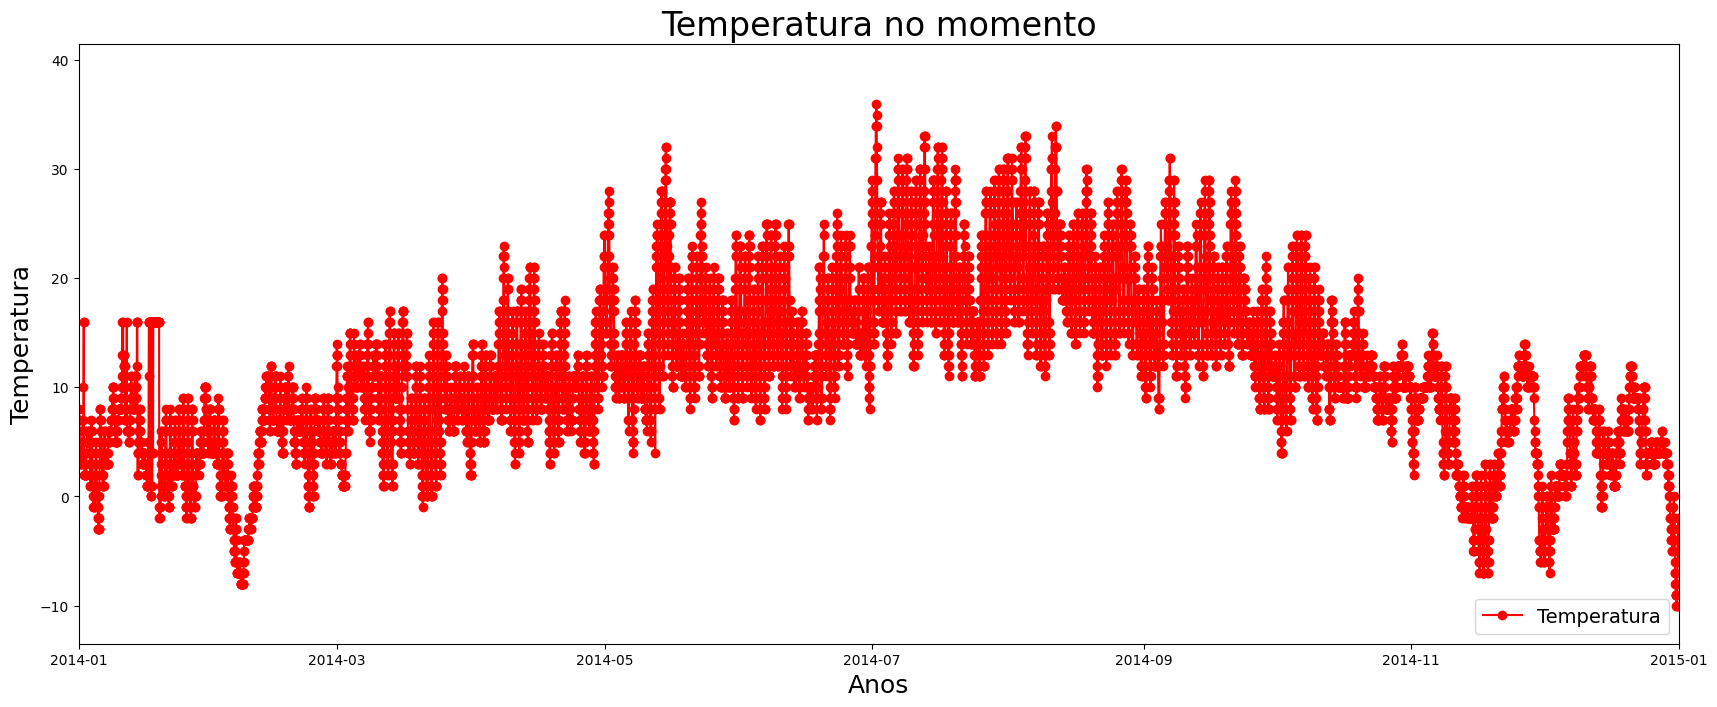

In [37]:
fig= plt.figure(figsize=(16,6))
eixo = fig.add_axes([0,0,1,1])

# Adicionando marcadores
eixo.plot(df['data'],df['temperatura'], color = 'red', marker ='o')

eixo.set_title('Temperatura no momento', fontsize = 24)
eixo.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2015,1,1))
eixo.set_xlabel('Anos', fontsize= 18)
eixo.set_ylabel('Temperatura', fontsize= 18)
eixo.legend(['Temperatura'], loc = "lower right", fontsize = 14)

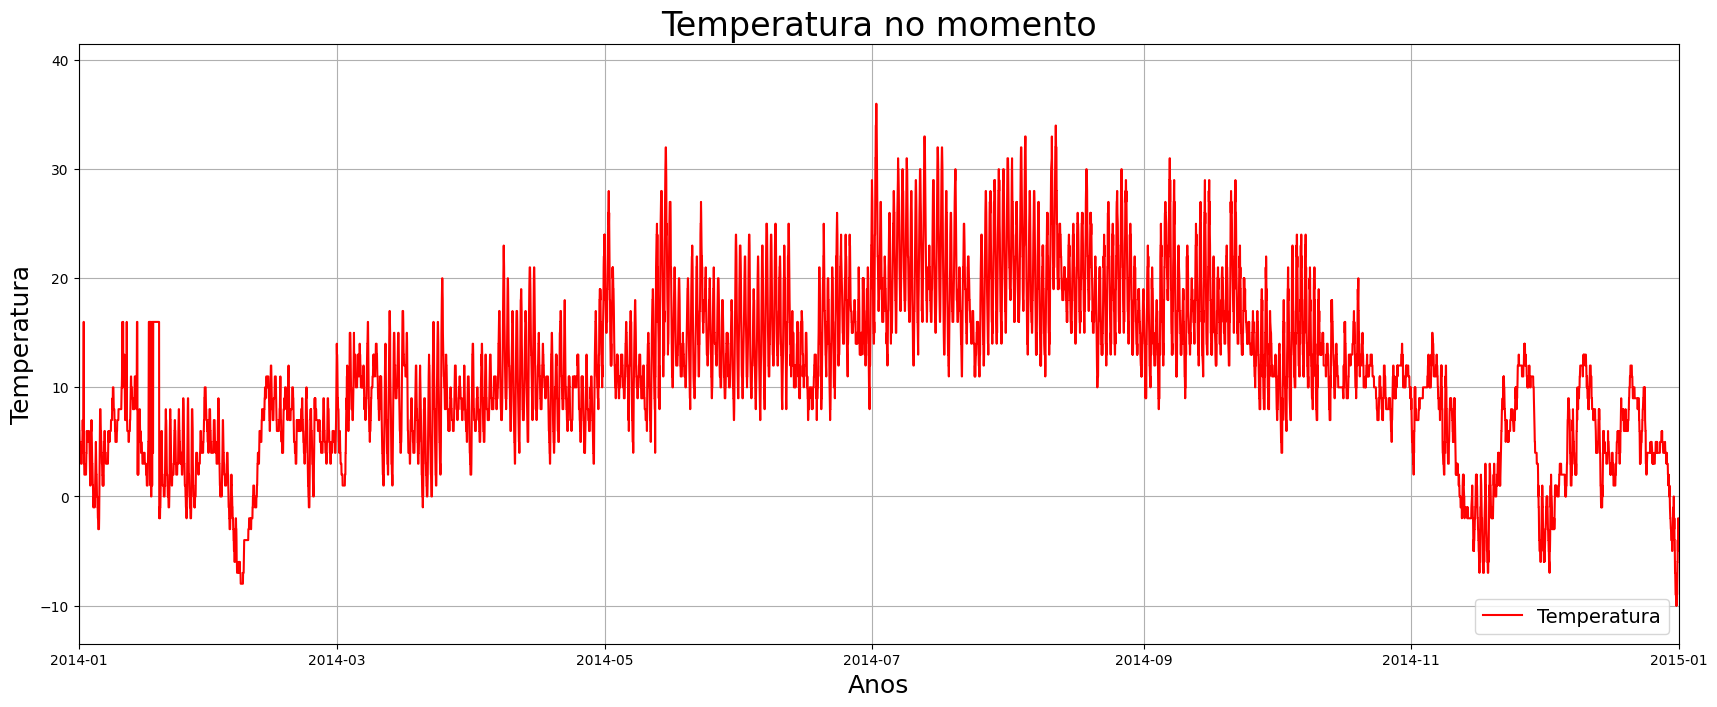

In [38]:
fig= plt.figure(figsize=(16,6))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(df['data'],df['temperatura'], color = 'red',)
eixo.set_title('Temperatura no momento', fontsize = 24)
eixo.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2015,1,1))
eixo.set_xlabel('Anos', fontsize= 18)
eixo.set_ylabel('Temperatura', fontsize= 18)
eixo.legend(['Temperatura'], loc = "lower right", fontsize = 14)
# adicionando uma grade métrica.
eixo.grid(True)

##Visualizações Compostas

###Tarefa 1: Crie um eixo dentro de outro sistema de eixos.

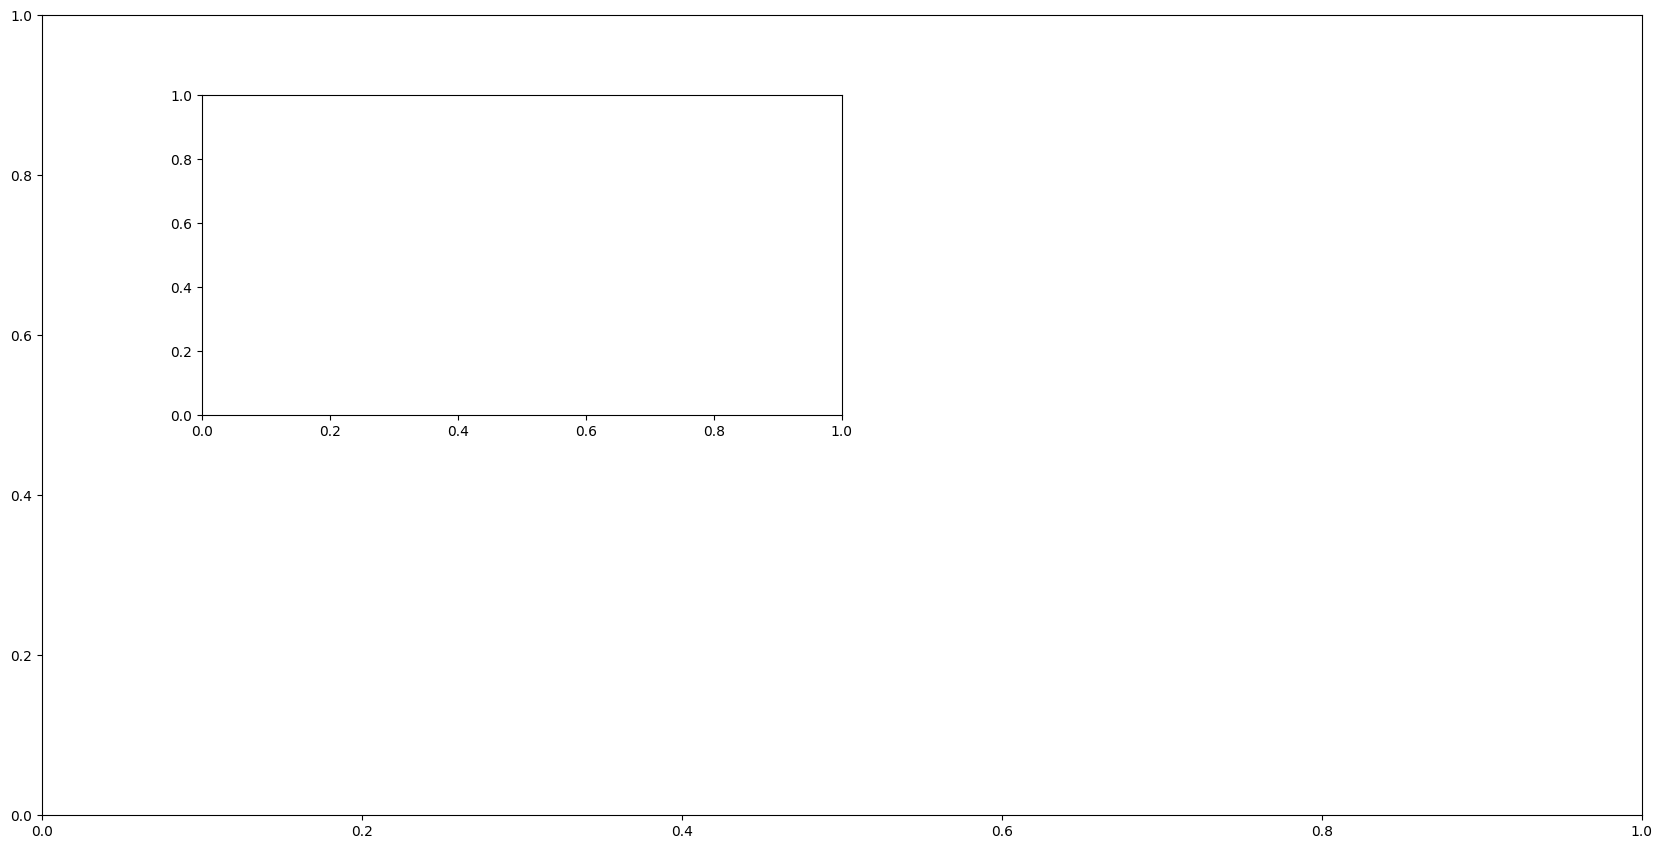

In [39]:
# Declaramos a vriável com o gráfico principal
fig = plt.figure(figsize=(16,8))

# Novamente declaramos o tamanho do eixo.
eixo = fig.add_axes([0, 0, 1, 1])

#Agora criamos um segundo eixo, onde a figura base deve ser a figura declarada no primeiro procedimento.
eixo2 = fig.add_axes([0.1, 0.5, 0.4, 0.4])


### Tarefa 2: forneça dados  da temperatura ao longo do ano para o eixo maior, configure com títulos e atributos necessários para um relatório.

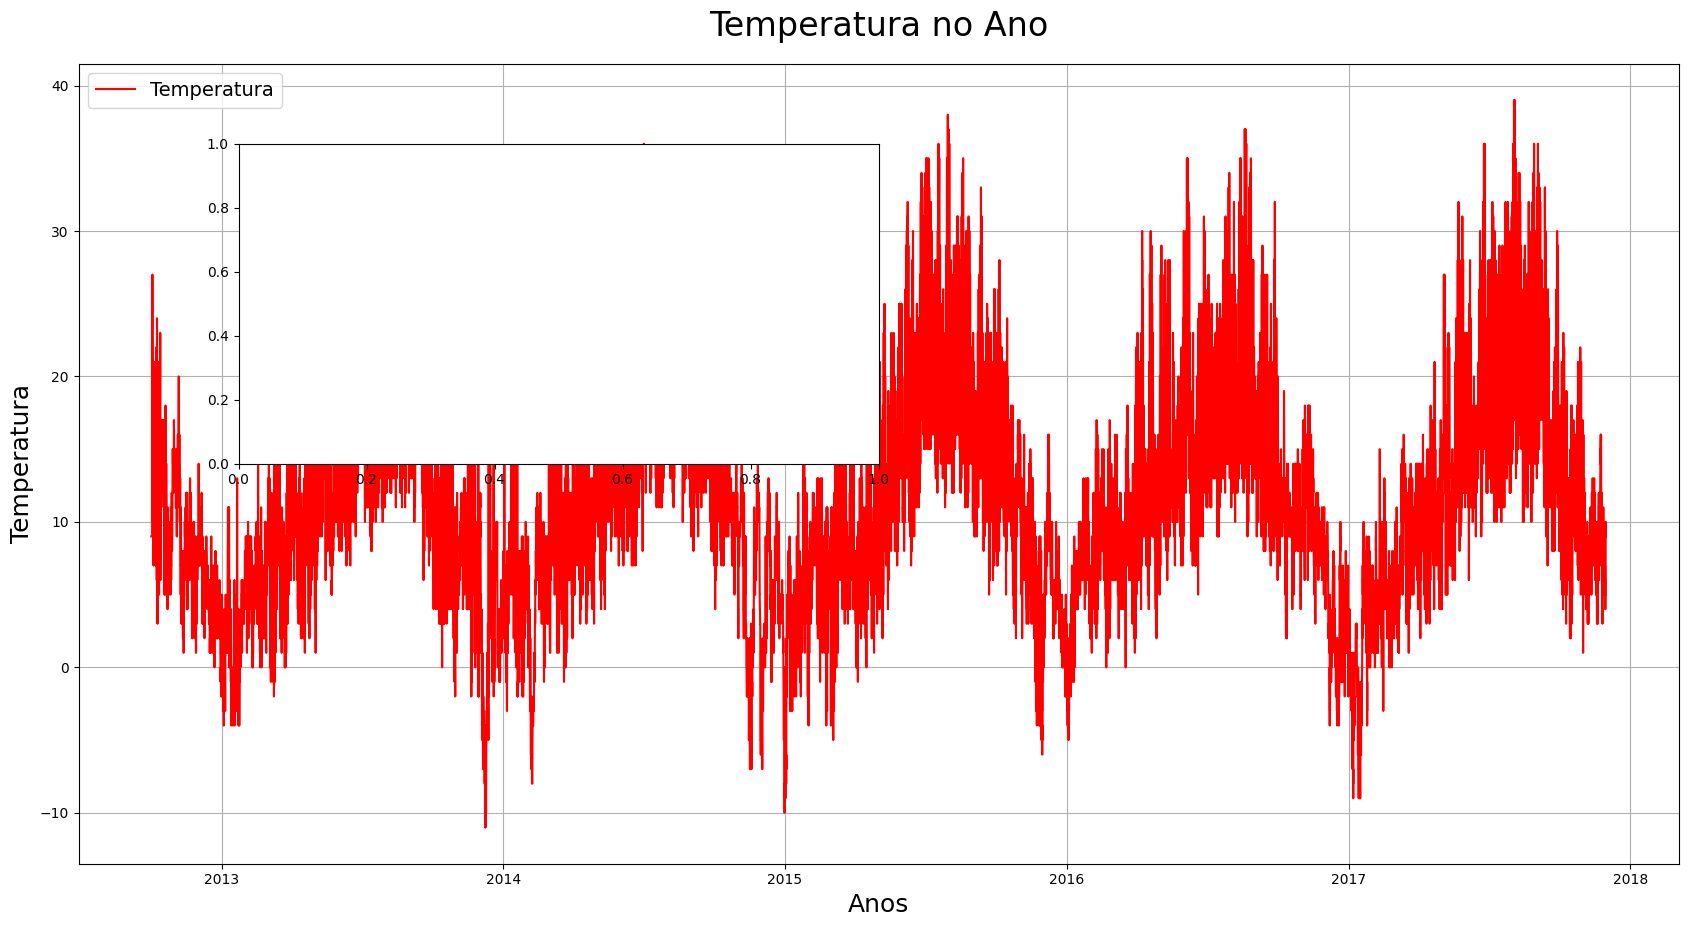

In [40]:
# Declaramos a vriável com o gráfico principal
fig = plt.figure(figsize=(16,8))

# Novamente declaramos o tamanho do eixo.
eixo = fig.add_axes([0, 0, 1, 1])

#Agora criamos um segundo eixo, onde a figura base deve ser a figura declarada no primeiro procedimento.
eixo2 = fig.add_axes([0.1, 0.5, 0.4, 0.4])

# Acrescentando dados aos eixos.
eixo.plot(df['data'],df['temperatura'], color = 'red')

# Colocando o título e dando um leve espaçamento do texto par o gráfico com o comando pad.
eixo.set_title('Temperatura no Ano', fontsize = 24, pad = 20)

# Adicionando uma grade métrica.
eixo.grid(True)

# Adicionando nome aos eixos (x,y)
eixo.set_xlabel('Anos', fontsize= 18)
eixo.set_ylabel('Temperatura', fontsize= 18)

# Legenda do dado
eixo.legend(['Temperatura'], loc = "best", fontsize = 14)





###Tarefa 3: Configure o eixo menor com a temperatura anual e o eixo maior com destaque para 2014 à 2015.

Text(0, 0.5, 'Temperatura')

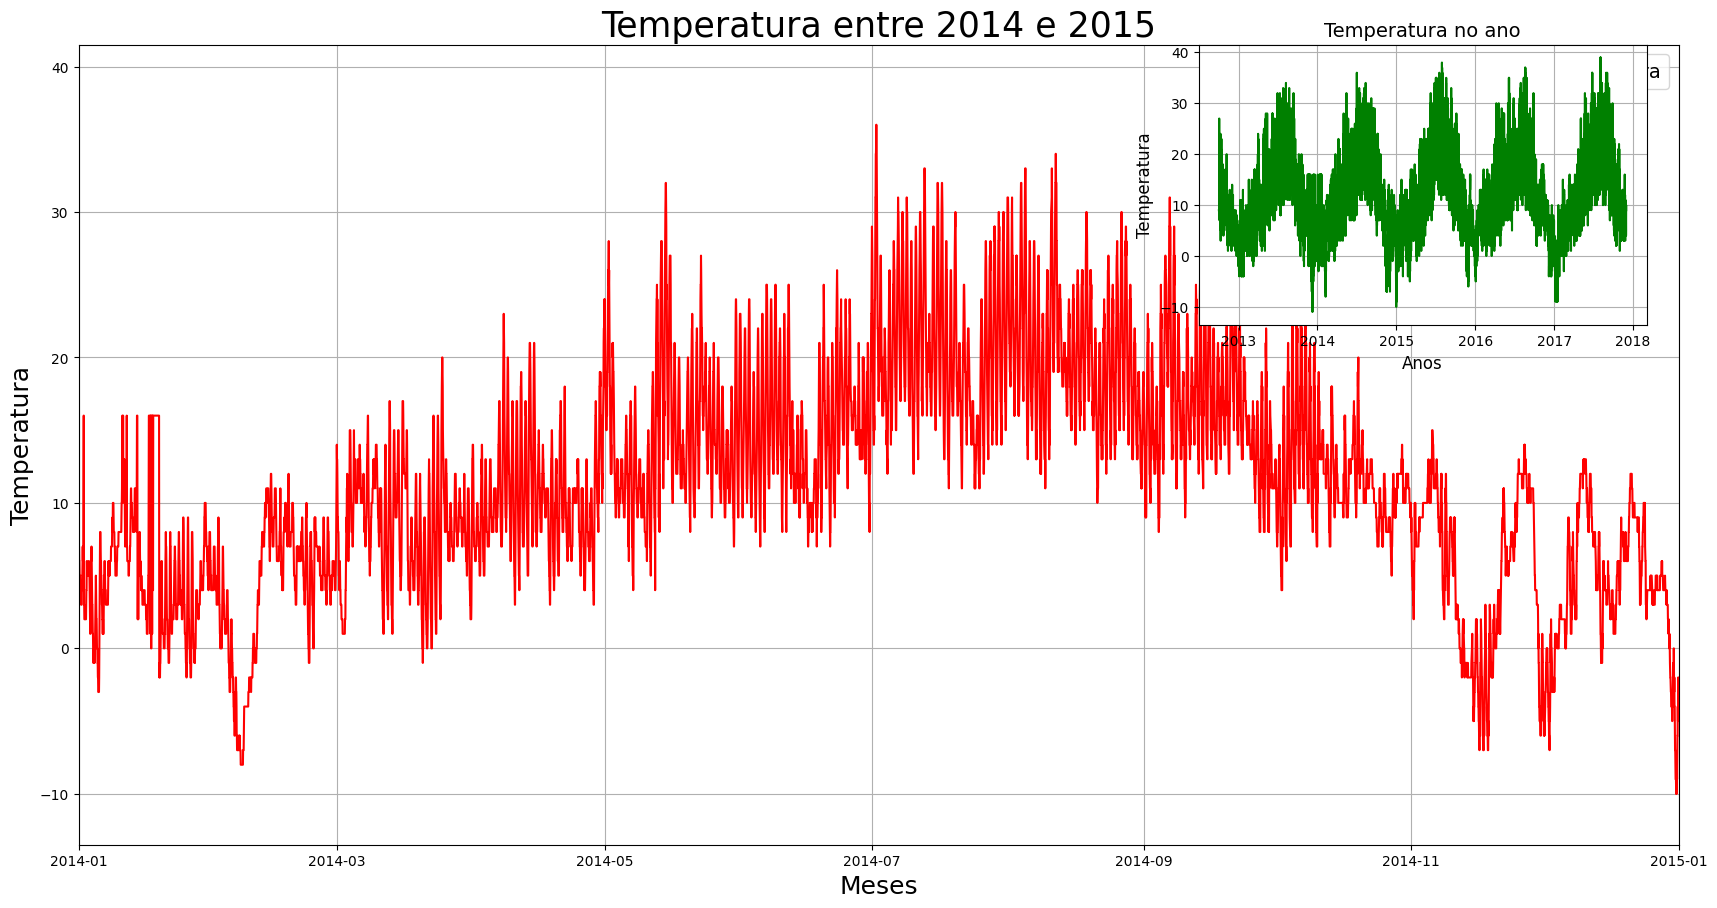

In [41]:
# Declaramos a vriável com o gráfico principal
fig = plt.figure(figsize=(16,8))

# Novamente declaramos o tamanho do eixo.
eixo = fig.add_axes([0, 0, 1, 1])

#Agora criamos um segundo eixo, onde a figura base deve ser a figura declarada no primeiro procedimento.
eixo2 = fig.add_axes([0.7, 0.65, 0.28, 0.35])

# Acrescentando dados aos eixos.
eixo.plot(df['data'],df['temperatura'], color = 'red')

# Colocando o título e dando um leve espaçamento do texto par o gráfico com o comando pad.
eixo.set_title('Temperatura no Ano', fontsize = 24, pad = 20)

# Adicionando uma grade métrica.
eixo.grid(True)

# Adicionando nome aos eixos (x,y)
eixo.set_title('Temperatura entre 2014 e 2015', fontsize = 25)
eixo.set_xlabel('Meses', fontsize = 18)
eixo.set_ylabel('Temperatura', fontsize= 18)

# Legenda do dado
eixo.legend(['Temperatura'], loc = "best", fontsize = 14)

# Criando o delimitador dos dados, não esquecendo de importar o datetime caso não tenha feito.
eixo.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2015,1,1))

# Configurações do eixo 2
eixo2.plot(df['data'], df['temperatura'], color = 'g')
eixo2.grid(True)

# Condigurando títulos para o eixo 2.
eixo2.set_title('Temperatura no ano', fontsize = 14)
eixo2.set_xlabel('Anos', fontsize= 12)
eixo2.set_ylabel('Temperatura', fontsize= 12)

##Customizando gráficos compostos.

###Tarefa 1: De um enfoque especial no mês de maio de 2014 e mantenha a projeção do ano de 2014  visível.

(16071.0, 16436.0)

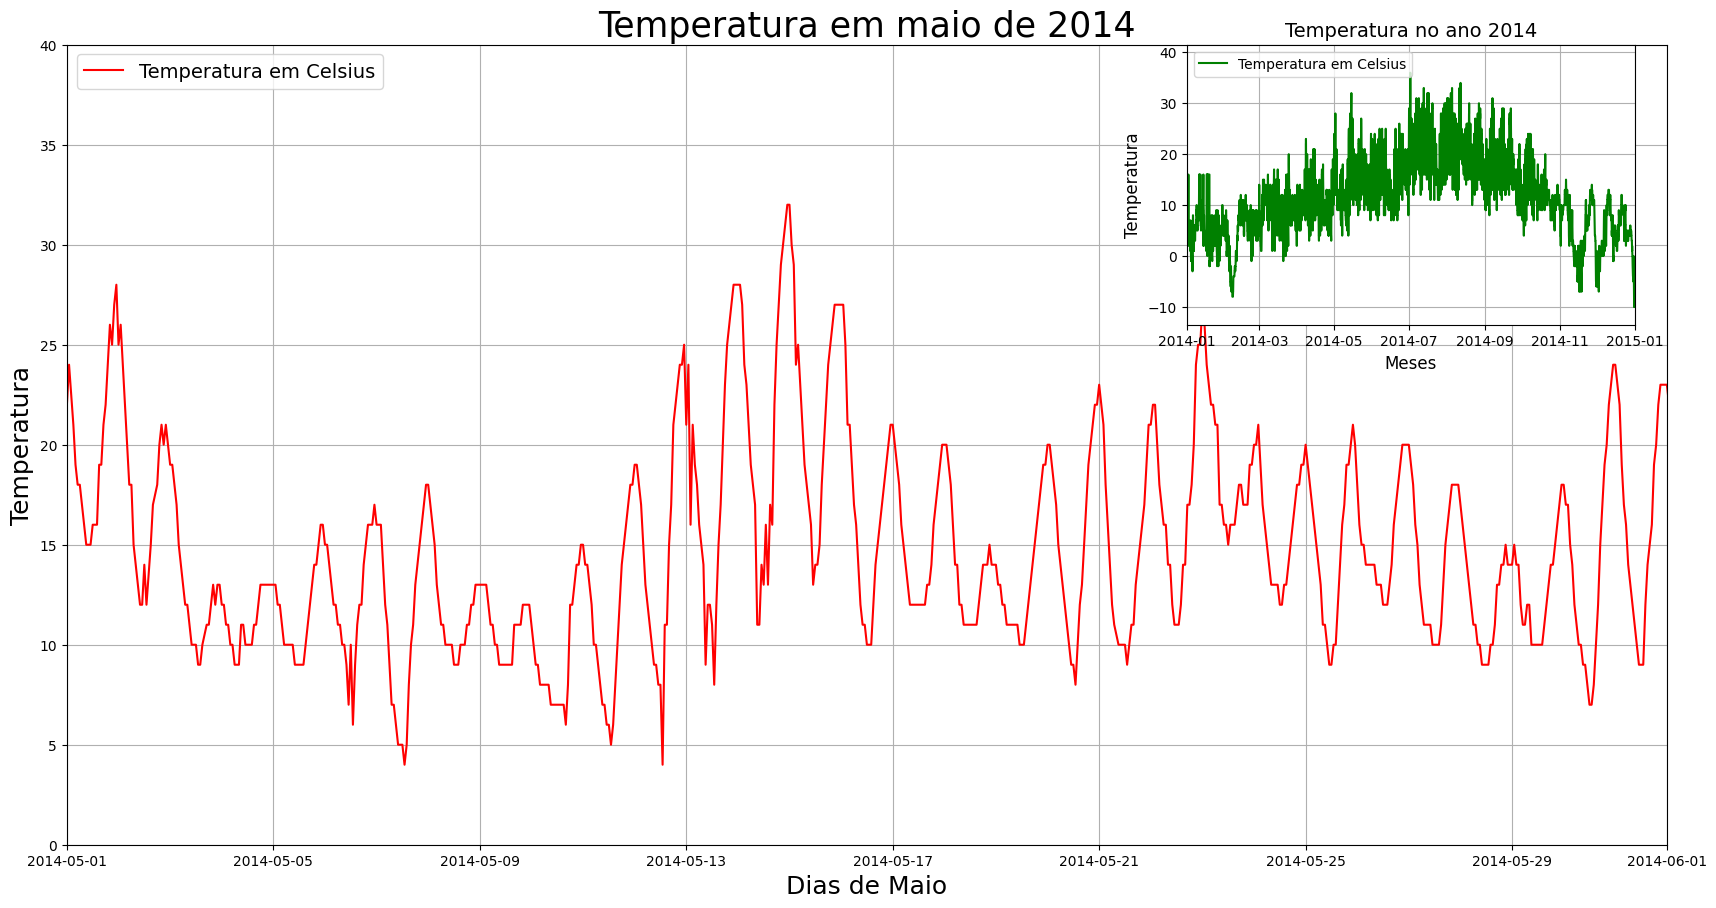

In [42]:
# Declaramos a vriável com o gráfico principal
fig = plt.figure(figsize=(16,8))

# Novamente declaramos o tamanho do eixo.
eixo = fig.add_axes([0, 0, 1, 1])

#Agora criamos um segundo eixo, onde a figura base deve ser a figura declarada no primeiro procedimento.
eixo2 = fig.add_axes([0.7, 0.65, 0.28, 0.35])

# Acrescentando dados aos eixos.
eixo.plot(df['data'],df['temperatura'], color = 'red')

# Colocando o título e dando um leve espaçamento do texto par o gráfico com o comando pad.
eixo.set_title('Temperatura no Ano', fontsize = 24, pad = 20)

# Adicionando uma grade métrica.
eixo.grid(True)

# Adicionando nome aos eixos (x,y)
eixo.set_title('Temperatura em maio de 2014', fontsize = 25)
eixo.set_xlabel('Dias de Maio', fontsize = 18)
eixo.set_ylabel('Temperatura', fontsize= 18)

# Legenda do dado
eixo.legend(['Temperatura em Celsius'], loc = "upper left", fontsize = 14)

# Criando o delimitador dos dados, não esquecendo de importar o datetime caso não tenha feito.
eixo.set_xlim(datetime.datetime(2014,5,1),datetime.datetime(2014,6,1))

# Criando um delimitador para o eixo y, para melhorar a visualização.
eixo.set_ylim(0, 40)

# Configurações do eixo 2
eixo2.plot(df['data'], df['temperatura'], color = 'g')
eixo2.grid(True)
# Legenda do dado
eixo2.legend(['Temperatura em Celsius'], loc = "upper left")

# Condigurando títulos para o eixo 2.
eixo2.set_title('Temperatura no ano 2014', fontsize = 14)
eixo2.set_xlabel('Meses', fontsize= 12)
eixo2.set_ylabel('Temperatura', fontsize= 12)

# Criando o delimitador dos dados, não esquecendo de importar o datetime caso não tenha feito.
eixo2.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2015,1,1))


###Tarefa 2: De um destaque no mês de Maio dentro do gráfico anual.

(16071.0, 16436.0)

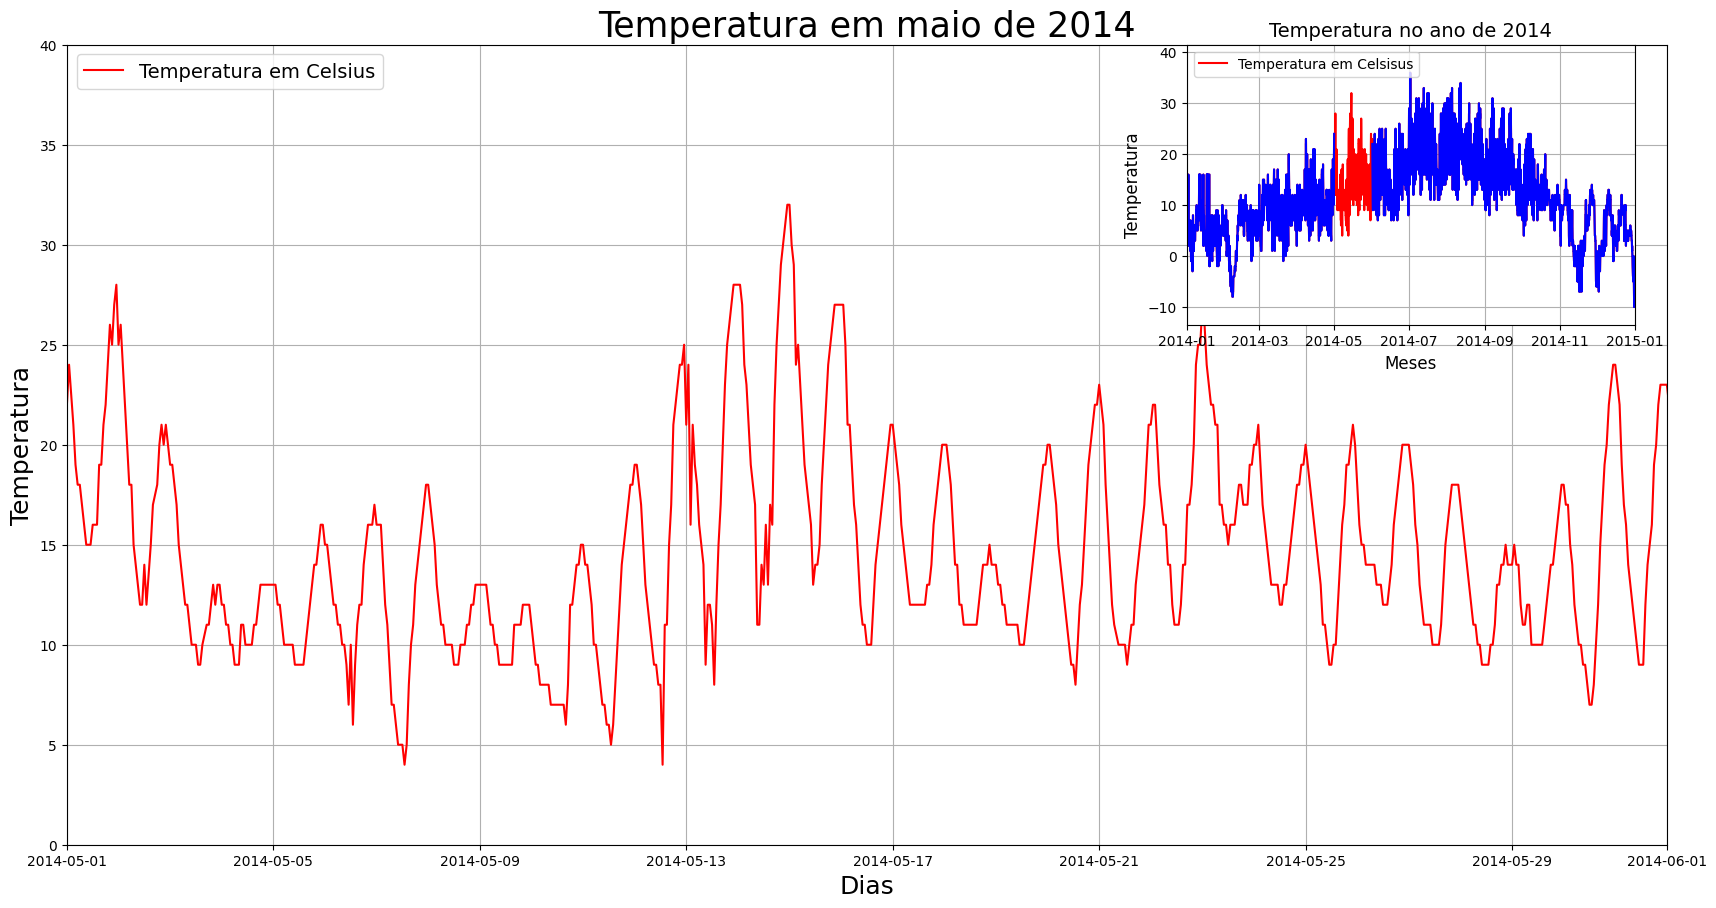

In [45]:
fig = plt.figure(figsize=(16,8))

# Configurações do eixo 1
eixo = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([0.7, 0.65, 0.28, 0.35])
eixo.plot(df['data'],df['temperatura'], color = 'red')
eixo.set_title('Temperatura no Ano de 2014', fontsize = 24, pad = 20)
eixo.grid(True)
eixo.set_title('Temperatura em maio de 2014', fontsize = 25)
eixo.set_xlabel('Dias', fontsize = 18)
eixo.set_ylabel('Temperatura', fontsize= 18)
eixo.legend(['Temperatura em Celsius'], loc = "upper left", fontsize = 14)
# Delimitador eixo 1
eixo.set_xlim(datetime.datetime(2014,5,1),datetime.datetime(2014,6,1))
eixo.set_ylim(0, 40)

# Configurações do eixo 2
eixo2.plot(df['data'], df['temperatura'], color = 'red') # plotando o gráfico com vermelho

# Adicionando filtros para o eixo 2
b_left = df['data'] < datetime.datetime(2014, 5, 1)
b_right = df['data'] > datetime.datetime(2014, 6, 1)

# Aplicando os filtros
eixo2.plot(df[b_left]['data'], df[b_left]['temperatura'], color = "blue")
eixo2.plot(df[b_right]['data'], df[b_right]['temperatura'], color = "blue")
eixo2.grid(True)
eixo2.legend(['Temperatura em Celsisus'], loc = "upper left")
eixo2.set_title('Temperatura no ano de 2014', fontsize = 14)
eixo2.set_xlabel('Meses', fontsize= 12)
eixo2.set_ylabel('Temperatura', fontsize= 12)
# Delimitador eixo 2
eixo2.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2015,1,1))

##Mínimos e máximos, na série historica.

###Tarefa 1: Encontre uma forma de realçar os valores máximos e mínimos na série.

Text(2017-08-03 00:00:00, 39.0, 'Máximo')

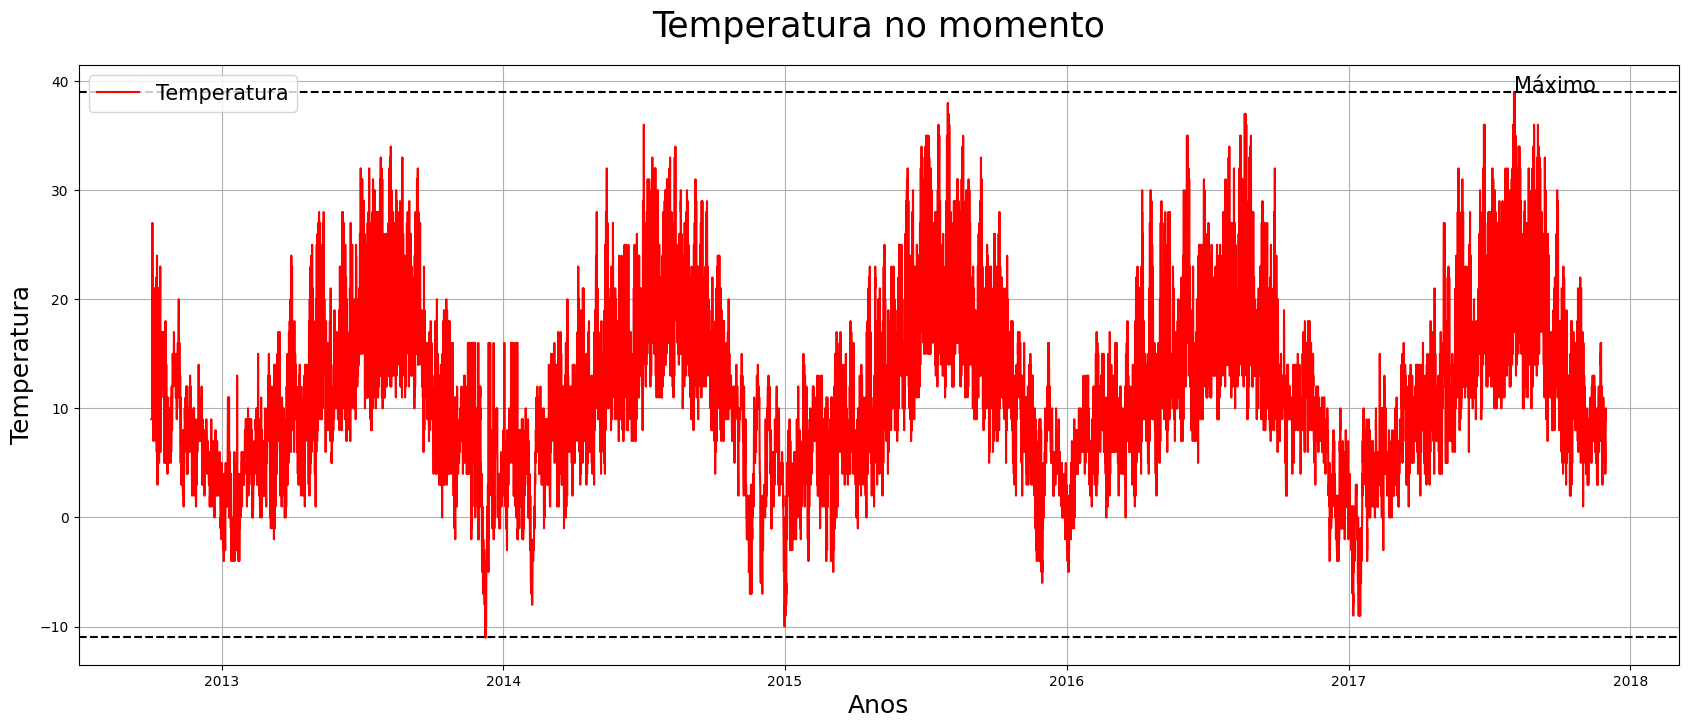

In [46]:
# recriando a figura.
fig = plt.figure(figsize= (16, 6))

# criando os eixos.
eixo = fig.add_axes([0, 0, 1, 1])

# carregando com os dados
eixo.plot(df['data'], df['temperatura'], color = "red")

# configurando os eixos, títulos e afins.

eixo.set_title('Temperatura no momento', fontsize = 25, pad = 20)
eixo.set_xlabel('Anos', fontsize = 18)
eixo.set_ylabel('Temperatura', fontsize = 18)

# Identificadores / legenda
eixo.legend(['Temperatura'], loc= "upper left", fontsize = 15)

# Adicionando as grades
eixo.grid(True)

# Limitadores no máx
eixo.axhline(max(df['temperatura']), color = 'black', ls = '--')

# Limitador no mín
eixo.axhline(min(df['temperatura']), color = 'black', ls = '--')

# Marcando os pontos notáveis
x_1 = df['data'][df['temperatura'].idxmax()]
y_1 = max(df['temperatura'])

# Aplicando os pontos
eixo.annotate('Máximo', xy=(x_1,y_1), fontsize = 15)

###Tarefa 2: Dê maior destaque ao ponto máximo.

Text(2013-02-19 17:00:00, -6.0, 'Mínimo')

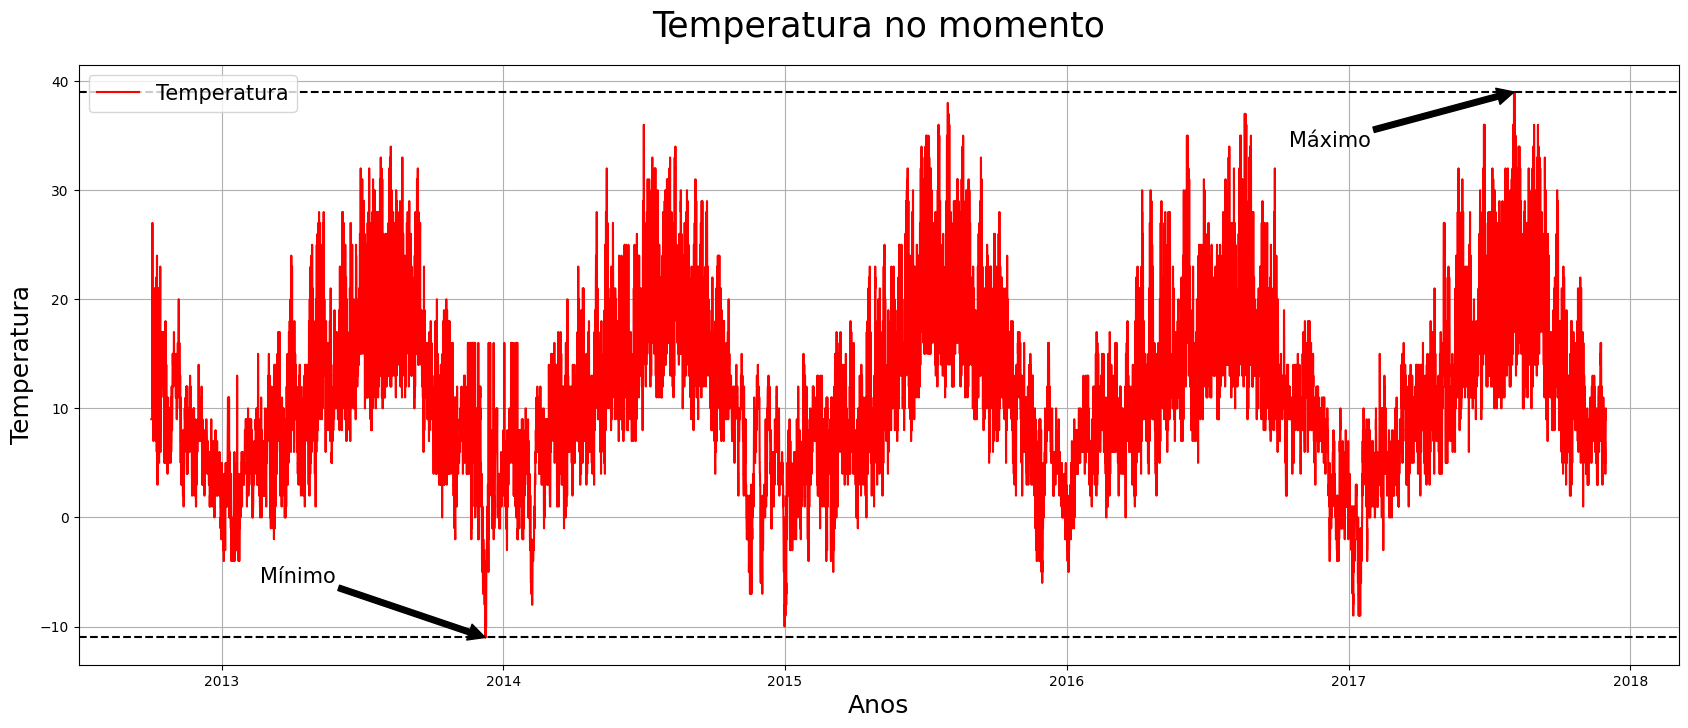

In [47]:
# recriando a figura.
fig = plt.figure(figsize= (16, 6))

# criando os eixos.
eixo = fig.add_axes([0, 0, 1, 1])

# carregando com os dados
eixo.plot(df['data'], df['temperatura'], color = "red")

# configurando os eixos, títulos e afins.

eixo.set_title('Temperatura no momento', fontsize = 25, pad = 20)
eixo.set_xlabel('Anos', fontsize = 18)
eixo.set_ylabel('Temperatura', fontsize = 18)

# Identificadores / legenda
eixo.legend(['Temperatura'], loc= "upper left", fontsize = 15)

# Adicionando as grades
eixo.grid(True)

# Limitadores no máx
eixo.axhline(max(df['temperatura']), color = 'black', ls = '--')

# Limitador no mín
eixo.axhline(min(df['temperatura']), color = 'black', ls = '--')

# Marcando os pontos notáveis
x_1 = df['data'][df['temperatura'].idxmax()]
y_1 = max(df['temperatura'])

# Criando uma SETA
# Marcando o ponto de origem da seta
x_2 = df['data'][df['temperatura'].idxmax() - 7000]
y_2 = max(df['temperatura'] - 5)

# Aplicando para o ponto mínimo.
x_3 = df['data'][df['temperatura'].idxmin()]
y_3 = min(df['temperatura'])
x_4 = df['data'][df['temperatura'].idxmin() - 7000]
y_4 = min(df['temperatura'] + 5)

# Aplicando os pontos e incorporando a SETA
eixo.annotate('Máximo', xy=(x_1,y_1), fontsize = 15, xytext = (x_2,y_2), arrowprops = dict(facecolor = 'black', ))
eixo.annotate('Mínimo', xy=(x_3,y_3), fontsize = 15, xytext = (x_4,y_4), arrowprops = dict(facecolor = 'black', ))

## Realize uma análise exploratória dos dados e  crie uma representação dos resultados.

###Tarefa 1: Gráfico de Barras.

In [48]:
# Criando uma função que agrupe a média dos valores por dias da semana.
temp_dias_semana = df.groupby('dia_da_semana')['temperatura'].mean()
temp_dias_semana

dia_da_semana
Domingo    11.599302
Quarta     11.552928
Quinta     11.543709
Segunda    11.558000
Sexta      11.637101
Sábado     11.527782
Terça      11.464178
Name: temperatura, dtype: float64

In [49]:
# Criando uma função que agrupe a média dos valores por dias da semana.
temp_dias_semana = df.groupby('dia_da_semana')['temperatura'].mean()

# Criando uma lista para organizar os dias da semana.
nome_dias =['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']

# Atribuindo o filtro criado
temp_dias_semana = temp_dias_semana[nome_dias]

temp_dias_semana

dia_da_semana
Domingo    11.599302
Segunda    11.558000
Terça      11.464178
Quarta     11.552928
Quinta     11.543709
Sexta      11.637101
Sábado     11.527782
Name: temperatura, dtype: float64

Text(0, 0.5, 'Média de temperatura')

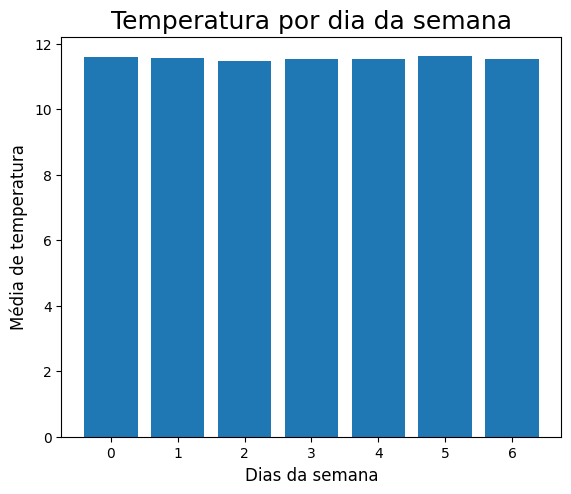

In [50]:
# Criando o gráfico.
fig = plt.figure(figsize= (5,4))

# Criando os eixos.
eixo = fig.add_axes([0, 0, 1, 1])

# Devemos saber de antemão quais e como serão as variáveis do meu eixo. Sendo assim, neste caso, devemos criar uma lista para o eixo X com os dias da semana.
indice = range(len(temp_dias_semana))

# Alimentando com os dados
eixo.bar(indice, temp_dias_semana)

# Configurações do gráfico
eixo.set_title('Temperatura por dia da semana', fontsize= 18)
eixo.set_xlabel('Dias da semana', fontsize = 12)
eixo.set_ylabel('Média de temperatura', fontsize =12)

###Tarefa 2: Crie uma legenda para o eixo x, de forma coerente com os dias da semana.

[Text(0, 0, 'Domingo'),
 Text(1, 0, 'Segunda'),
 Text(2, 0, 'Terça'),
 Text(3, 0, 'Quarta'),
 Text(4, 0, 'Quinta'),
 Text(5, 0, 'Sexta'),
 Text(6, 0, 'Sábado')]

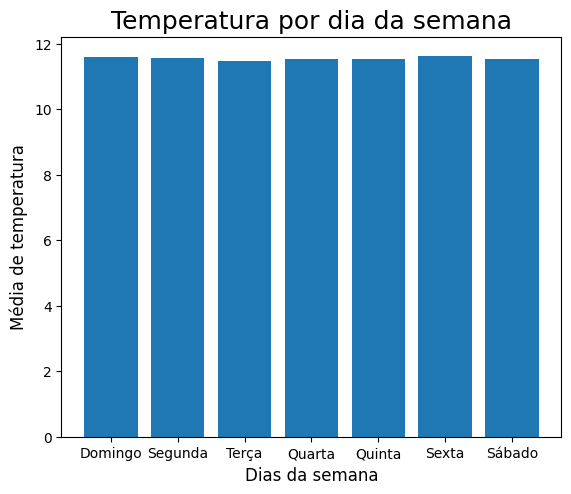

In [51]:
# Criando o gráfico.
fig = plt.figure(figsize= (5,4))

# Criando os eixos.
eixo = fig.add_axes([0, 0, 1, 1])

# Devemos saber de antemão quais e como serão as variáveis do meu eixo. Sendo assim, neste caso, devemos criar uma lista para o eixo X com os dias da semana.
indice = range(len(temp_dias_semana))

# Alimentando com os dados
eixo.bar(indice, temp_dias_semana)

# Configurações do gráfico
eixo.set_title('Temperatura por dia da semana', fontsize= 18)
eixo.set_xlabel('Dias da semana', fontsize = 12)
eixo.set_ylabel('Média de temperatura', fontsize =12)

# Adicionando a legenda em string para os dias da semana.
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias)

###Tarefa 3: Customização dos gráficos.

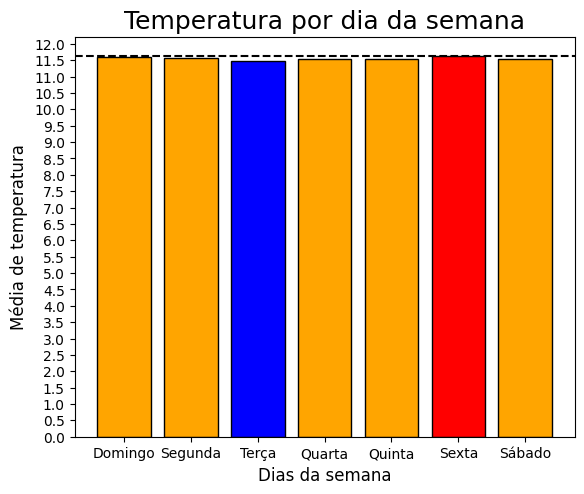

In [64]:
# Criando o gráfico.
fig = plt.figure(figsize= (5,4))

# Criando os eixos.
eixo = fig.add_axes([0, 0, 1, 1])

# Devemos saber de antemão quais e como serão as variáveis do meu eixo. Sendo assim, neste caso, devemos criar uma lista para o eixo X com os dias da semana.
indice = range(len(temp_dias_semana))

# Criando uma lista de cores personalizadas.
cores = ['orange','orange','b','orange','orange','red','orange']

# Alimentando com os dados E adicionando a lista de cores
eixo.bar(indice, temp_dias_semana, color = cores, edgecolor = 'black')

# Configurações do gráfico
eixo.set_title('Temperatura por dia da semana', fontsize= 18)
eixo.set_xlabel('Dias da semana', fontsize = 12)
eixo.set_ylabel('Média de temperatura', fontsize =12)

# Adicionando a legenda em string para os dias da semana.
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias)

# Limitadores no máx
eixo.set_ylim()
eixo.set_yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12])
eixo.axhline(max(temp_dias_semana), color = 'black', ls = '--')


### Tarefa 4: Produzindo outro tipo de gráfico que mostre as mesmas informações.

Text(0.5, 1.0, 'Temperaturas por dias da semana')

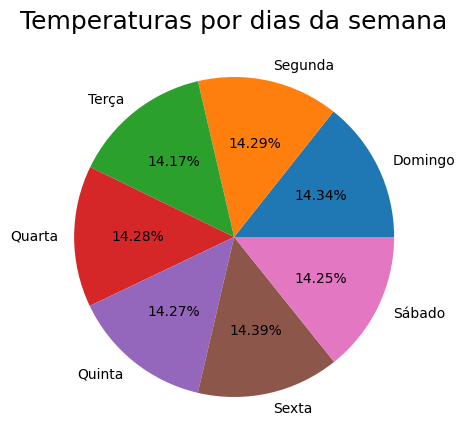

In [53]:
# Criando gráfico
fig = plt.figure(figsize=(5,4))

# Tamanho eixo principal
eixo = fig.add_axes([0, 0, 1, 1])

# Escolhendo o gráfico
eixo.pie(temp_dias_semana, labels = temp_dias_semana.index, autopct= '%.2f%%') # setando o uso de porcentagem  dentro do gráfico e permitindo apenas 1 casa após a vírgula.

# Configurações
eixo.set_title('Temperaturas por dias da semana', fontsize = 18)

# Add informações

Text(0.5, 1.0, 'Temperaturas por dias da semana')

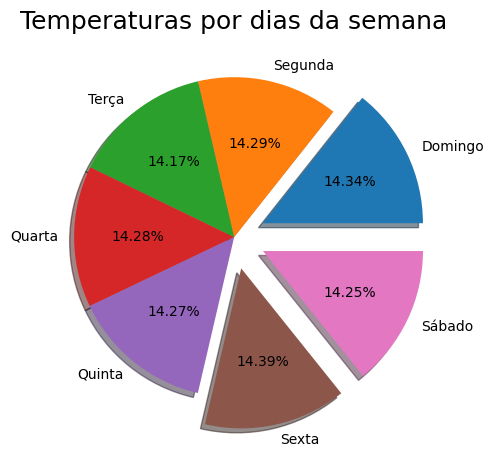

In [65]:
# Criando gráfico
fig = plt.figure(figsize=(5,4))

# Tamanho eixo principal
eixo = fig.add_axes([0, 0, 1, 1])


# Explodindo os finais de semana, crie uma  variável onde float é explodir e 0 não.
explodir = [0.2, 0, 0, 0, 0, 0.2, 0.2]

# Escolhendo o gráfico
eixo.pie(temp_dias_semana, labels = temp_dias_semana.index, explode= explodir, shadow = True,
         autopct= '%.2f%%') # setando o uso de porcentagem  dentro do gráfico e permitindo apenas 1 casa após a vírgula.

# Configurações
eixo.set_title('Temperaturas por dias da semana', fontsize = 18)
